# Heart Failure Prediction

In [213]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# parameter selectors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# warnings
import warnings
warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv("./data/heart_failure_clinical_records_dataset.csv")

## Understand the data

In [27]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [22]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Observations about the dataset
- Average age is 60, ranging from 40 to 95
- 43% have anaemia
- 42% have diabetes
- 35% have high blood pressure
- 32% smoke
- 32% died in the follow up perdiod
- 64% male 36% female
- No null values
- Small size (300)

In [28]:
# separate the features into numerical and categorical
cols = list(data.columns)
cols_num = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
cols_cat = [col for col in cols if col not in cols_num]
cols_cat.remove("DEATH_EVENT")

In [31]:
# get the numerical and categorical features as a dataset
data_num = data[cols_num]
data_cat = data[cols_cat]

## Numerical data

In [32]:
data_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [33]:
pd.pivot_table(data, index="DEATH_EVENT", values=cols_num)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
DEATH_EVENT,,,,,,,
0,58.761906,540.054187,40.26601,266657.489901,1.184877,137.216749,158.339901
1,65.215281,670.197917,33.46875,256381.044792,1.835833,135.375000,70.885417


## Categorical data

In [49]:
data_cat.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [48]:
for col in data_cat.columns:
    pt = pd.pivot_table(data, index="DEATH_EVENT", columns=col, values="age", aggfunc="count")
    display(pt)
    hit = pt[0][0] + pt[1][1]
    miss = pt[0][1] + pt[1][0]
    hit_ratio = float(hit) / (hit + miss)
    print(hit_ratio)
    print("--------------------------------------")

anaemia,0,1
DEATH_EVENT,,
0,120,83
1,50,46


0.5551839464882943
--------------------------------------


diabetes,0,1
DEATH_EVENT,,
0,118,85
1,56,40


0.5284280936454849
--------------------------------------


high_blood_pressure,0,1
DEATH_EVENT,,
0,137,66
1,57,39


0.5886287625418061
--------------------------------------


sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


0.44481605351170567
--------------------------------------


smoking,0,1
DEATH_EVENT,,
0,137,66
1,66,30


0.5585284280936454
--------------------------------------


In [57]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

## Standardize the data

In [88]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

# Gaussian Naive Bayes
I experimented with both standardized and non-standardized data. The model showed better results with the unaltered data in both validation and test scores. The default value for the smoothing parameter (1e-9) was the optimal one.<br>
The percentage accuracy for the same is as follows:
|              | Validation | Test |
|--------------|------------|------|
| Unaltered    | 77         | 93   |
| Standardized | 74         | 83   |

In [91]:
# cv scores
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train, y_train, cv=10)
print(cv.mean())

0.7704710144927536


In [89]:
# cv scores for standardized data
gnb_std = GaussianNB()
cv = cross_val_score(gnb_std, x_train_std, y_train, cv=10)
print(cv.mean())

0.7403985507246377


In [199]:
# gnb test scores
gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

In [200]:
# gnb test scores with standardized data
gnb_std = GaussianNB()
gnb_std.fit(x_train_std, y_train)
y_pred = gnb_std.predict(x_test_std)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

# Logistic Regression
The standardized data showed a lower validation score, but ultimately performed better on the test set
|              | Validation | Test |
|--------------|------------|------|
| Unaltered    | 78         | 86   |
| Standardized | 77         | 88   |

In [124]:
lr = LogisticRegression(max_iter=1000)

cv = cross_val_score(lr, x_train, y_train, cv=10)
cv_std = cross_val_score(lr, x_train_std, y_train, cv=10)

print(cv.mean())
print(cv_std.mean())

0.7871376811594202
0.7778985507246376


In [201]:
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8666666666666667

In [202]:
lr_std = LogisticRegression(max_iter=1000)
lr_std.fit(x_train_std, y_train)
y_pred = lr_std.predict(x_test_std)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8833333333333333

# KNN

KNN performed significantly better with standardized data, but the overall accuracy was not high.
|              | Validation | Test |
|--------------|------------|------|
| Unaltered    | 65         | 68   |
| Standardized | 74         | 80   |

In [203]:
knn = KNeighborsClassifier(n_neighbors=10)
cv = cross_val_score(knn, x_train, y_train, cv=10)
cv_std = cross_val_score(knn, x_train_std, y_train, cv=10)
print(cv.mean())
print(cv_std.mean())

0.6483695652173913
0.7358695652173912


In [204]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6833333333333333

In [205]:
knn_std = KNeighborsClassifier(n_neighbors=10)
knn_std.fit(x_train_std, y_train)
y_pred = knn_std.predict(x_test_std)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

# Random Forest
Since Random Forests are not sensitive to the scale of the data, we do not need to standardize the values.<br>
We were able to get a high accuracy of 95% with 1000 estimators in the Random Forest.

In [173]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
cv = cross_val_score(rf, x_train, y_train, cv=10)
print(cv.mean())

0.8286231884057971


In [174]:
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy = ", accuracy)

Test accuracy =  0.95


<AxesSubplot: >

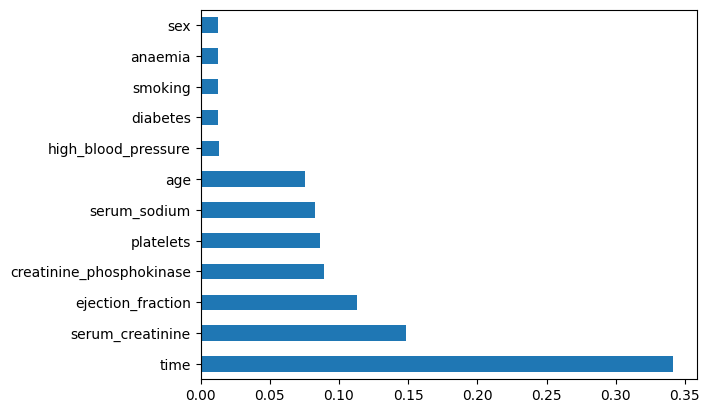

In [196]:
# importance of each feature for the classification
ft_imp = pd.Series(rf.feature_importances_, index=cols[:-1])
ft_imp.nlargest(20).plot(kind="barh")

# Support Vector Classifier
|              | Validation | Test |
|--------------|------------|------|
| Unaltered    | 66         | 77   |
| Standardized | 76         | 90   |

In [177]:
svc = SVC()
cv = cross_val_score(svc, x_train, y_train, cv=10)
cv_std = cross_val_score(svc, x_train_std, y_train, cv=10)
print(cv.mean())
print(cv_std.mean())

0.6568840579710145
0.7568840579710145


In [178]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7666666666666667

In [209]:
svc_std = SVC()
svc_std.fit(x_train_std, y_train)
y_pred = svc_std.predict(x_test_std)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

# Ensemble Methods

In [215]:
estimators = [
    ("RF", rf),
    ("LR", lr_std),
    ("KNN", knn_std),
]

voting_hard = VotingClassifier(estimators=estimators, voting="hard")
voting_soft = VotingClassifier(estimators=estimators, voting="soft")

In [216]:
cvs = cross_val_score(voting_hard, x_train, y_train, cv=10)
print("Hard Voting: ", cvs.mean())

Hard Voting:  0.816304347826087


In [217]:
cvs = cross_val_score(voting_soft, x_train, y_train, cv=10)
print("Soft Voting: ", cvs.mean())

Soft Voting:  0.7992753623188406
